In [4]:
import numpy as np

class LogisticRegressionGD:
    """A simple class implementation of the Logistic Regression classifier trained with 
    full batch gradient descent.
    
    Parameters
    -----------
    eta: float
        Learning rate (between 0.0 and 1.0)
    n_iter: int
        Number of epochs (number of iterations over the training 
        dataset)
    random_state: int
        Seed for the random initialization of the weights and bias.
    tol: float
        Loss value threshold below which the training stops, even if less than
        n_iter epochs were performed.
    """

    def __init__(self, eta=0.1, n_iter=50, random_state=1, tol=0.01):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.tol = tol

    def fit(self, X, y):
        """Trains the Logistic Regression classifier to fit the training data

        Parameters
        -----------
        X: [array-like], shape = [n_samples, n_features]
            Training vectors. n_features is the number of predictors
            per sample, while n_sample is the number of samples in 
            the training dataset
        y: array-like, shape = [n_samples]
            Vector with the corresponding class for each of the
            training samples in the training dataset

        Returns
        --------
        self:  object
        """
        self._initwb(X.shape[1])
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self._net_input(X)
            output  = self._activation(net_input)
            errors = (y - output)
            loss = self._cross_entropy(y, output)
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()
            self.losses_.append(loss)
            if loss < self.tol:
                print(f'End of training, converged after {i + 1} iterations.')
                break       
        else:
            print(f'End of training, max n of iterations ({self.n_iter}) reached.')    
        return self
                
    def _net_input(self, X):
        """Calculate the weighted sum input to the neuron"""
        return np.dot(X, self.w_) + self.b_
    
    def _activation(self, z):
        """Sigmoid activation function"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def _cross_entropy(self, y, output):
        """Cross entropy loss function"""
        return  (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1-output)))) / len(y)
    
    def predict(self, X):
        """Calculate the output of the Logistic Regression classifier and return class prediction"""
        activation = self._activation(self._net_input(X))
        return np.where(activation >= 0.5, 1, 0)

    def _initwb(self, n_features):
        """Initialize weights and bias of the Logistic Regression classifier"""
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=n_features)
        self.b_ = np.float_(0.0)

In [5]:
import pandas as pd
df = pd.read_csv("iris.data.csv", header=None, encoding='utf-8')
df.tail()

# Select only Setosa and Versicolor targets
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# Extract sepal and petal length
X = df.iloc[0:100, [0, 2]].values

End of training, converged after 975 iterations.


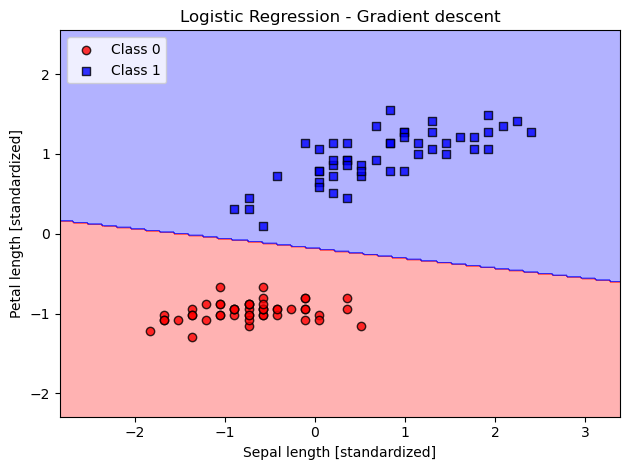

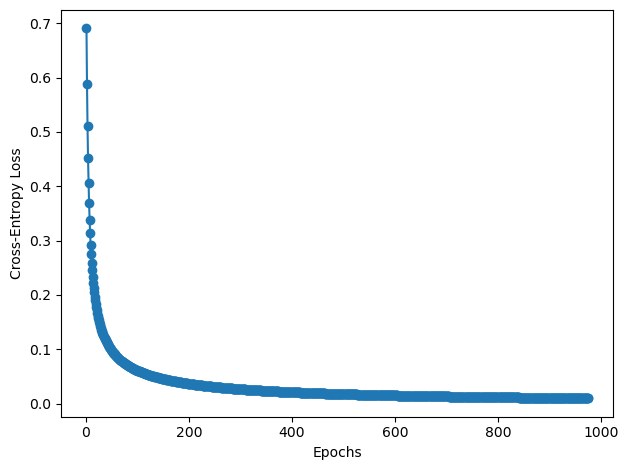

In [10]:
import matplotlib.pyplot as plt

# Make a copy of the dataset with standardized features
X_std = X.copy()
X_std[:,0] = (X_std[:,0] - X_std[:,0].mean()) / X_std[:,0].std()
X_std[:,1] = (X_std[:,1] - X_std[:,1].mean()) / X_std[:,1].std()

# Train the Logistic Regression object
logistic_regression = LogisticRegressionGD(eta=0.3, n_iter=1000)
logistic_regression.fit(X_std, y)

# Function used to plot the decision boundary
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1 
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1 
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class example
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')


# Make plots
plot_decision_regions(X_std, y, classifier=logistic_regression)
plt.title('Logistic Regression - Gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(logistic_regression.losses_) + 1),
         logistic_regression.losses_, 
         marker='o')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.tight_layout()
plt.show()